In [1]:
import warnings
warnings.filterwarnings("ignore")

In [3]:
import pandas as pd
import seaborn as sns
import numpy as np

In [4]:
df = pd.read_csv('laptop_data.csv')

In [5]:
df.head()

,Unnamed: 0,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price
0,0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,71378.6832
1,1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,47895.5232
2,2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,No OS,1.86kg,30636.0000
3,3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16GB,512GB SSD,AMD Radeon Pro 455,macOS,1.83kg,135195.3360
4,4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8GB,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37kg,96095.8080


In [6]:
df.describe()

,Unnamed: 0,Inches,Price
count,1303.00000,1303.000000,1303.000000
mean,651.00000,15.017191,59870.042910
std,376.28801,1.426304,37243.201786
min,0.00000,10.100000,9270.720000
25%,325.50000,14.000000,31914.720000
50%,651.00000,15.600000,52054.560000
75%,976.50000,15.600000,79274.246400
max,1302.00000,18.400000,324954.720000


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1303 entries, 0 to 1302
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Unnamed: 0        1303 non-null   int64  
 1   Company           1303 non-null   object 
 2   TypeName          1303 non-null   object 
 3   Inches            1303 non-null   float64
 4   ScreenResolution  1303 non-null   object 
 5   Cpu               1303 non-null   object 
 6   Ram               1303 non-null   object 
 7   Memory            1303 non-null   object 
 8   Gpu               1303 non-null   object 
 9   OpSys             1303 non-null   object 
 10  Weight            1303 non-null   object 
 11  Price             1303 non-null   float64
dtypes: float64(2), int64(1), object(9)
memory usage: 122.3+ KB


In [8]:
df.duplicated().sum()

0

## Data Cleaning

In [16]:
df.drop( columns=['Unnamed: 0'], inplace = True)

In [18]:
df.sample()

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price
557,Lenovo,Notebook,17.3,1600x900,Intel Core i7 7500U 2.7GHz,6GB,128GB SSD + 1TB HDD,Nvidia GeForce 940MX,Windows 10,2.8kg,50562.72


In [20]:
df['Ram'] = df['Ram'].str.replace('GB',"")

In [22]:
df['Weight'] = df['Weight'].str.replace('kg',"")

In [24]:
df.sample()

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price
449,Microsoft,Ultrabook,13.5,Touchscreen 2256x1504,Intel Core i7 7660U 2.5GHz,16,512GB SSD,Intel Iris Plus Graphics 640,Windows 10 S,1.25,137941.92


In [26]:
df['Ram'] = df['Ram'].astype('int32')

In [28]:
df['Weight'] = df['Weight'].astype('float32')

In [30]:
df['ScreenResolution'].value_counts()

ScreenResolution
Full HD 1920x1080                                507
1366x768                                         281
IPS Panel Full HD 1920x1080                      230
IPS Panel Full HD / Touchscreen 1920x1080         53
Full HD / Touchscreen 1920x1080                   47
1600x900                                          23
Touchscreen 1366x768                              16
Quad HD+ / Touchscreen 3200x1800                  15
IPS Panel 4K Ultra HD 3840x2160                   12
IPS Panel 4K Ultra HD / Touchscreen 3840x2160     11
4K Ultra HD / Touchscreen 3840x2160               10
4K Ultra HD 3840x2160                              7
Touchscreen 2560x1440                              7
IPS Panel 1366x768                                 7
IPS Panel Quad HD+ / Touchscreen 3200x1800         6
IPS Panel Retina Display 2560x1600                 6
IPS Panel Retina Display 2304x1440                 6
Touchscreen 2256x1504                              6
IPS Panel Touchscreen 2560x14

In [32]:
df['Touchscreen'] = df['ScreenResolution'].apply( lambda x:1 if 'Touchscreen' in x else 0)

In [34]:
df['Touchscreen'].value_counts()

Touchscreen
0    1111
1     192
Name: count, dtype: int64

In [36]:
df['Ips'] = df['ScreenResolution'].apply(lambda x:1 if 'IPS' in x else 0)

In [38]:
df.head()

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,Touchscreen,Ips
0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,0,1
1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232,0,0
2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,30636.0000,0,0
3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,135195.3360,0,1
4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080,0,1


In [40]:
new = df['ScreenResolution'].str.split('x',n=1,expand=True)

In [42]:
df['X_res'] = new[0]
df['Y_res'] = new[1]

In [43]:
df.sample(5)

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,Touchscreen,Ips,X_res,Y_res
244,Lenovo,2 in 1 Convertible,13.9,IPS Panel Full HD / Touchscreen 1920x1080,Intel Core i7 7500U 2.7GHz,8,256GB SSD,Intel HD Graphics 620,Windows 10,1.38,57489.120,1,1,IPS Panel Full HD / Touchscreen 1920,1080
256,HP,Notebook,15.6,1366x768,AMD A6-Series A6-9220 2.5GHz,8,128GB SSD,AMD Radeon R4 Graphics,Windows 10,1.91,23757.552,0,0,1366,768
1170,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i7 6500U 2.5GHz,8,256GB SSD,Intel HD Graphics 520,Windows 10,1.96,36177.120,0,0,Full HD 1920,1080
1222,HP,Notebook,15.6,Full HD 1920x1080,AMD A12-Series 9720P 2.7GHz,6,1TB HDD,AMD Radeon 530,Windows 10,2.10,28185.120,0,0,Full HD 1920,1080
1163,Lenovo,Notebook,15.6,1366x768,Intel Core i3 6006U 2.0GHz,8,1TB HDD,Intel HD Graphics 520,Windows 10,2.20,24455.520,0,0,1366,768


In [44]:
df['X_res'] = df['X_res'].str.findall(r'(\d+\.?\d+)').apply(lambda x:x[0])

In [45]:
df.sample()

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,Touchscreen,Ips,X_res,Y_res
93,Dell,Gaming,15.6,Full HD 1920x1080,Intel Core i5 7300HQ 2.5GHz,8,256GB SSD,Nvidia GeForce GTX 1060,Windows 10,2.65,63669.6,0,0,1920,1080


In [46]:
df['X_res'] = df['X_res'].astype('int')
df['Y_res'] = df['Y_res'].astype('int')

In [47]:
df['PPI'] = (((df['X_res']**2) + (df['Y_res']**2))**0.5/df['Inches']).astype('float')

In [54]:
df.head()

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,Touchscreen,Ips,X_res,Y_res,PPI
0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,0,1,2560,1600,226.983005
1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232,0,0,1440,900,127.677940
2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,30636.0000,0,0,1920,1080,141.211998
3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,135195.3360,0,1,2880,1800,220.534624
4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080,0,1,2560,1600,226.983005


In [56]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1303 entries, 0 to 1302
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Company           1303 non-null   object 
 1   TypeName          1303 non-null   object 
 2   Inches            1303 non-null   float64
 3   ScreenResolution  1303 non-null   object 
 4   Cpu               1303 non-null   object 
 5   Ram               1303 non-null   int32  
 6   Memory            1303 non-null   object 
 7   Gpu               1303 non-null   object 
 8   OpSys             1303 non-null   object 
 9   Weight            1303 non-null   float32
 10  Price             1303 non-null   float64
 11  Touchscreen       1303 non-null   int64  
 12  Ips               1303 non-null   int64  
 13  X_res             1303 non-null   int32  
 14  Y_res             1303 non-null   int32  
 15  PPI               1303 non-null   float64
dtypes: float32(1), float64(3), int32(3), int64

In [58]:
df.drop( columns= ['ScreenResolution', 'X_res', 'Y_res'],inplace = True)

In [60]:
df.head()

,Company,TypeName,Inches,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,Touchscreen,Ips,PPI
0,Apple,Ultrabook,13.3,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,0,1,226.983005
1,Apple,Ultrabook,13.3,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232,0,0,127.677940
2,HP,Notebook,15.6,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,30636.0000,0,0,141.211998
3,Apple,Ultrabook,15.4,Intel Core i7 2.7GHz,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,135195.3360,0,1,220.534624
4,Apple,Ultrabook,13.3,Intel Core i5 3.1GHz,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080,0,1,226.983005


In [62]:
df.corr(numeric_only=True)['Price']

Inches         0.068197
Ram            0.743007
Weight         0.210370
Price          1.000000
Touchscreen    0.191226
Ips            0.252208
PPI            0.473487
Name: Price, dtype: float64

In [64]:
df['Cpu'].value_counts()

Cpu
Intel Core i5 7200U 2.5GHz       190
Intel Core i7 7700HQ 2.8GHz      146
Intel Core i7 7500U 2.7GHz       134
Intel Core i7 8550U 1.8GHz        73
Intel Core i5 8250U 1.6GHz        72
                                ... 
Intel Core M M3-6Y30 0.9GHz        1
AMD A9-Series 9420 2.9GHz          1
Intel Core i3 6006U 2.2GHz         1
AMD A6-Series 7310 2GHz            1
Intel Xeon E3-1535M v6 3.1GHz      1
Name: count, Length: 118, dtype: int64

In [66]:
df['Cpu Name'] = df['Cpu'].apply(lambda x:" ".join(x.split()[0:3]))

In [68]:
df.head(1)

,Company,TypeName,Inches,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,Touchscreen,Ips,PPI,Cpu Name
0,Apple,Ultrabook,13.3,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,0,1,226.983005,Intel Core i5


In [70]:
def fetch_processor(text):
    if text == 'Intel Core i7' or text == 'Intel Core i5' or text == 'Intel Core i3':
        return text
    else:
        if text.split()[0] == 'Intel':
            return 'Other Intel Processor'
        else:
            return 'AMD Processor'

In [72]:
df['Cpu brand'] = df['Cpu Name'].apply(fetch_processor)

In [74]:
df.sample(5)

,Company,TypeName,Inches,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,Touchscreen,Ips,PPI,Cpu Name,Cpu brand
1066,Asus,Gaming,17.3,Intel Core i7 6820HK 2.7GHz,64,1TB SSD,Nvidia GeForce GTX 980,Windows 10,3.58,211788.00,0,1,127.335675,Intel Core i7,Intel Core i7
1160,Lenovo,Ultrabook,14.0,Intel Core i7 6600U 2.6GHz,8,256GB SSD,Intel HD Graphics 520,Windows 7,1.70,79866.72,0,0,157.350512,Intel Core i7,Intel Core i7
1092,Asus,Gaming,17.3,Intel Core i7 7700HQ 2.8GHz,8,256GB SSD + 1TB HDD,Nvidia GeForce GTX 1060,Windows 10,2.70,85194.72,0,1,127.335675,Intel Core i7,Intel Core i7
690,Acer,Notebook,14.0,Intel Celeron Dual Core 3855U 1.6GHz,4,32GB Flash Storage,Intel HD Graphics 510,Chrome OS,1.45,19980.00,0,0,111.935204,Intel Celeron Dual,Other Intel Processor
499,Lenovo,Notebook,15.6,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,Windows 10,2.30,48538.08,0,1,141.211998,Intel Core i5,Intel Core i5


In [76]:
df.drop(columns=['Cpu','Cpu Name'],inplace=True)

In [78]:
df.sample(5)

,Company,TypeName,Inches,Ram,Memory,Gpu,OpSys,Weight,Price,Touchscreen,Ips,PPI,Cpu brand
1145,HP,Workstation,15.6,8,256GB SSD,Nvidia Quadro M1000M,Windows 7,2.00,101178.72,0,0,141.211998,Intel Core i7
916,HP,Notebook,13.3,8,256GB SSD,Intel HD Graphics 620,Windows 10,1.49,51148.80,0,0,165.632118,Intel Core i5
894,MSI,Gaming,17.3,16,512GB SSD + 2TB HDD,Nvidia GeForce GTX 1060,Windows 10,2.43,141138.72,0,1,254.671349,Intel Core i7
71,Dell,Ultrabook,13.3,8,256GB SSD,AMD Radeon 530,Windows 10,1.40,50882.40,0,1,165.632118,Intel Core i7
877,Xiaomi,Ultrabook,13.3,8,256GB SSD,Nvidia GeForce 940MX,Windows 10,1.28,49816.80,0,1,165.632118,Intel Core i5


In [80]:
df['Memory'].value_counts()

Memory
256GB SSD                        412
1TB HDD                          223
500GB HDD                        132
512GB SSD                        118
128GB SSD +  1TB HDD              94
128GB SSD                         76
256GB SSD +  1TB HDD              73
32GB Flash Storage                38
2TB HDD                           16
64GB Flash Storage                15
512GB SSD +  1TB HDD              14
1TB SSD                           14
256GB SSD +  2TB HDD              10
1.0TB Hybrid                       9
256GB Flash Storage                8
16GB Flash Storage                 7
32GB SSD                           6
180GB SSD                          5
128GB Flash Storage                4
512GB SSD +  2TB HDD               3
16GB SSD                           3
512GB Flash Storage                2
1TB SSD +  1TB HDD                 2
256GB SSD +  500GB HDD             2
128GB SSD +  2TB HDD               2
256GB SSD +  256GB SSD             2
512GB SSD +  256GB SSD         

In [82]:
df['Memory'] = df['Memory'].astype(str).replace('\.0', '', regex=True)
df["Memory"] = df["Memory"].str.replace('GB', '')
df["Memory"] = df["Memory"].str.replace('TB', '000')

In [84]:
new = df["Memory"].str.split("+", n=1, expand=True)

df["first"]= new[0].str.strip()
df["second"]= new[1]

In [86]:
df["second"].fillna("0", inplace=True)

In [88]:
df["Layer1HDD"] = df["first"].apply(lambda x: 1 if "HDD" in x else 0)
df["Layer1SSD"] = df["first"].apply(lambda x: 1 if "SSD" in x else 0)
df["Layer1Hybrid"] = df["first"].apply(lambda x: 1 if "Hybrid" in x else 0)
df["Layer1Flash_Storage"] = df["first"].apply(lambda x: 1 if "Flash Storage" in x else 0)

In [90]:
df["Layer2HDD"] = df["second"].apply(lambda x: 1 if "HDD" in x else 0)
df["Layer2SSD"] = df["second"].apply(lambda x: 1 if "SSD" in x else 0)
df["Layer2Hybrid"] = df["second"].apply(lambda x: 1 if "Hybrid" in x else 0)
df["Layer2Flash_Storage"] = df["second"].apply(lambda x: 1 if "Flash Storage" in x else 0)

In [92]:
df.sample(5)

,Company,TypeName,Inches,Ram,Memory,Gpu,OpSys,Weight,Price,Touchscreen,...,first,second,Layer1HDD,Layer1SSD,Layer1Hybrid,Layer1Flash_Storage,Layer2HDD,Layer2SSD,Layer2Hybrid,Layer2Flash_Storage
818,Dell,Gaming,17.3,16,128 SSD + 1000 HDD,Nvidia GeForce GTX 1060,Windows 10,4.36,133467.4656,0,...,128 SSD,1000 HDD,0,1,0,0,1,0,0,0
633,Lenovo,Notebook,15.6,4,1000 HDD,Nvidia GeForce 920MX,Windows 10,2.20,30849.1200,0,...,1000 HDD,0,1,0,0,0,0,0,0,0
991,HP,Notebook,15.6,4,128 SSD + 1000 HDD,AMD Radeon 520,Windows 10,2.10,26586.7200,0,...,128 SSD,1000 HDD,0,1,0,0,1,0,0,0
496,Lenovo,Notebook,15.6,8,256 SSD,Intel UHD Graphics 620,Windows 10,2.17,47893.3920,0,...,256 SSD,0,0,1,0,0,0,0,0,0
294,Lenovo,Notebook,15.6,8,256 SSD,Intel UHD Graphics 620,Windows 10,2.05,39373.9200,0,...,256 SSD,0,0,1,0,0,0,0,0,0


In [94]:
df['first'] = df['first'].str.replace(r'\D', '')
df["second"].fillna("0", inplace = True)
df['second'] = df['second'].str.replace(r'\D', '')

In [96]:
df["HDD"] = (df["first"]*df["Layer1HDD"] + df["second"]*df["Layer2HDD"])
df["SSD"] = (df["first"]*df["Layer1SSD"] + df["second"]*df["Layer2SSD"])
df["Hybrid"] = (df["first"]*df["Layer1Hybrid"] + df["second"]*df["Layer2Hybrid"])
df["Flash_Storage"] = (df["first"]*df["Layer1Flash_Storage"] + df["second"]*df["Layer2Flash_Storage"])

In [98]:
df.drop(columns=['first', 'second', 'Layer1HDD', 'Layer1SSD', 'Layer1Hybrid',
       'Layer1Flash_Storage', 'Layer2HDD', 'Layer2SSD', 'Layer2Hybrid',
       'Layer2Flash_Storage'],inplace=True)

In [100]:
df.sample(5)

,Company,TypeName,Inches,Ram,Memory,Gpu,OpSys,Weight,Price,Touchscreen,Ips,PPI,Cpu brand,HDD,SSD,Hybrid,Flash_Storage
961,Lenovo,Ultrabook,12.5,8,256 SSD,Intel HD Graphics 620,Windows 10,1.36,93772.8000,0,1,176.232574,Intel Core i5,,256 SSD,,
1289,Asus,Ultrabook,13.3,8,512 SSD,Intel HD Graphics 515,Windows 10,1.20,38841.1200,0,1,165.632118,Other Intel Processor,,512 SSD,,
375,HP,Notebook,15.6,4,256 SSD,AMD Radeon R5,Windows 10,1.91,26053.3872,0,0,141.211998,AMD Processor,,256 SSD,,
748,Dell,Notebook,14.0,8,256 SSD,Intel HD Graphics 620,Windows 10,1.60,60031.1088,0,0,111.935204,Intel Core i5,,256 SSD,,
1146,HP,Ultrabook,12.5,8,256 SSD,Intel HD Graphics 520,Windows 7,1.26,122381.4960,0,0,176.232574,Intel Core i7,,256 SSD,,


In [102]:
df.drop(columns=['Hybrid','Flash_Storage'],inplace=True)

In [104]:
df.sample(5)

,Company,TypeName,Inches,Ram,Memory,Gpu,OpSys,Weight,Price,Touchscreen,Ips,PPI,Cpu brand,HDD,SSD
645,Lenovo,Notebook,14.0,4,32 Flash Storage,Intel HD Graphics,Windows 10,1.43,14598.72,0,0,111.935204,Other Intel Processor,,
416,Dell,Notebook,13.3,4,128 SSD,Intel HD Graphics 520,Windows 10,1.65,36709.92,0,0,117.826530,Intel Core i3,,128 SSD
319,Acer,Notebook,11.6,4,128 Flash Storage,Intel HD Graphics 405,Windows 10,1.40,25840.80,0,0,135.094211,Other Intel Processor,,
1210,Apple,Ultrabook,12.0,8,512 Flash Storage,Intel HD Graphics 515,Mac OS X,0.92,68145.12,0,1,226.415547,Other Intel Processor,,
604,Dell,Notebook,15.6,4,1000 HDD,AMD Radeon R5 M420,Linux,2.18,24775.20,0,0,100.454670,Intel Core i3,1000 HDD,


In [106]:
df['Gpu'].value_counts()

Gpu
Intel HD Graphics 620      281
Intel HD Graphics 520      185
Intel UHD Graphics 620      68
Nvidia GeForce GTX 1050     66
Nvidia GeForce GTX 1060     48
                          ... 
AMD Radeon R5 520            1
AMD Radeon R7                1
Intel HD Graphics 540        1
AMD Radeon 540               1
ARM Mali T860 MP4            1
Name: count, Length: 110, dtype: int64

In [108]:
df['Gpu Brand'] = df['Gpu'].apply( lambda x: x.split()[0])

In [110]:
df.sample(5)

,Company,TypeName,Inches,Ram,Memory,Gpu,OpSys,Weight,Price,Touchscreen,Ips,PPI,Cpu brand,HDD,SSD,Gpu Brand
22,HP,Notebook,15.6,4,500 HDD,AMD Radeon R2,No OS,1.86,13746.2400,0,0,100.454670,AMD Processor,500 HDD,,AMD
358,Dell,Notebook,15.6,8,2000 HDD,Intel HD Graphics 620,Windows 10,2.36,29696.6736,1,0,100.454670,Intel Core i5,2000 HDD,,Intel
960,Toshiba,Notebook,13.3,8,256 SSD,Intel HD Graphics 520,Windows 10,1.20,81784.8000,0,0,165.632118,Intel Core i5,,256 SSD,Intel
3,Apple,Ultrabook,15.4,16,512 SSD,AMD Radeon Pro 455,macOS,1.83,135195.3360,0,1,220.534624,Intel Core i7,,512 SSD,AMD
425,Dell,Gaming,15.6,8,128 SSD + 1000 HDD,Nvidia GeForce GTX 1050 Ti,Windows 10,2.62,61751.5200,0,1,141.211998,Intel Core i7,1000 HDD,128 SSD,Nvidia


In [112]:
df.drop(columns = ['Gpu'], inplace = True)

In [114]:
df['OpSys'].value_counts()

OpSys
Windows 10      1072
No OS             66
Linux             62
Windows 7         45
Chrome OS         27
macOS             13
Mac OS X           8
Windows 10 S       8
Android            2
Name: count, dtype: int64

In [116]:
def os( input ):
    if input == 'Windows 10' or input == 'Windows 7' or input == 'Windows 10 S':
        return 'Windows'
    elif input == 'macOS' or input == 'Mac OS X':
        return 'mac'
    else:
        return 'others/No OS/Linux'

In [118]:
df['OS'] = df['OpSys'].apply(os)

In [120]:
df.sample(5)

,Company,TypeName,Inches,Ram,Memory,OpSys,Weight,Price,Touchscreen,Ips,PPI,Cpu brand,HDD,SSD,Gpu Brand,OS
224,Dell,Gaming,17.3,16,256 SSD + 1000 HDD,Windows 10,4.42,130873.7952,0,1,127.335675,Intel Core i7,1000 HDD,256 SSD,Nvidia,Windows
279,Lenovo,Notebook,17.3,8,2000 HDD,No OS,2.80,45234.7200,0,0,127.335675,Intel Core i7,2000 HDD,,Nvidia,others/No OS/Linux
1160,Lenovo,Ultrabook,14.0,8,256 SSD,Windows 7,1.70,79866.7200,0,0,157.350512,Intel Core i7,,256 SSD,Intel,Windows
91,Acer,Notebook,15.6,8,1000 HDD,Windows 10,2.20,36709.9200,0,0,141.211998,Intel Core i7,1000 HDD,,Nvidia,Windows
640,Lenovo,Gaming,15.6,8,128 SSD + 1000 HDD,Windows 10,2.50,59087.5200,0,1,141.211998,Intel Core i7,1000 HDD,128 SSD,Nvidia,Windows


In [122]:
df.drop(columns = ['OpSys'], inplace = True)

## Data Visualization

In [125]:
import seaborn as sns
import matplotlib.pyplot as plt

<Axes: xlabel='Price', ylabel='Density'>

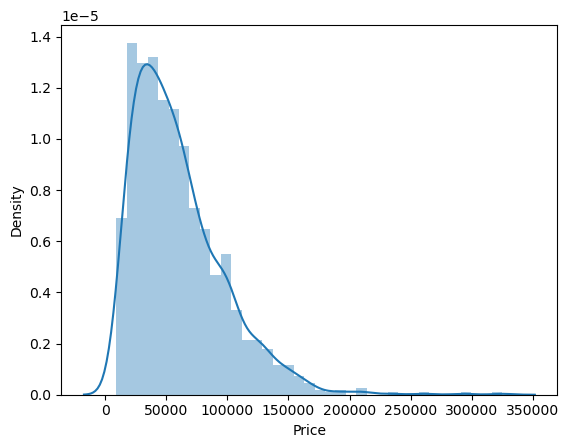

In [127]:
sns.distplot(df['Price'])

<Axes: xlabel='Company'>

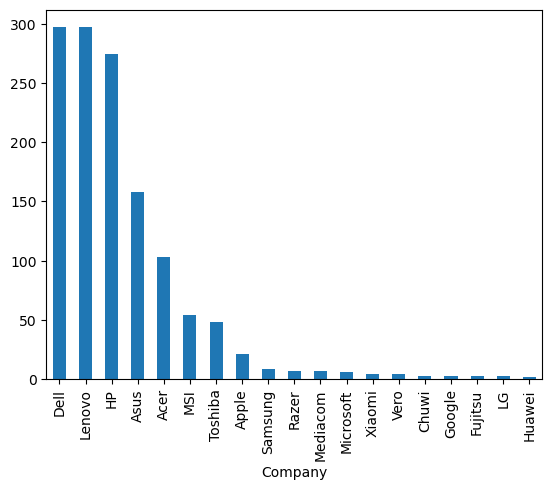

In [128]:
df['Company'].value_counts().plot(kind = 'bar')

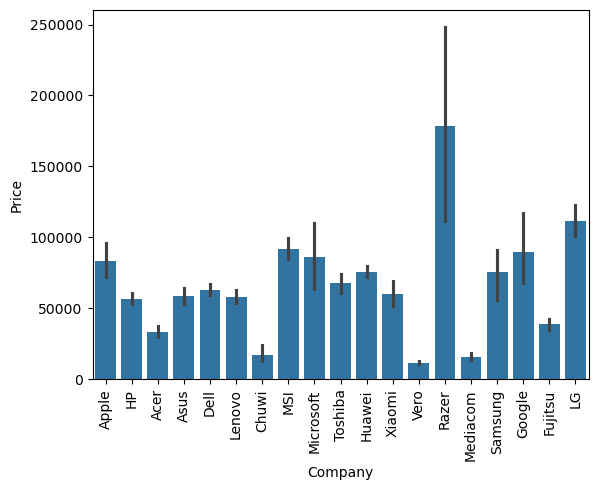

In [130]:
sns.barplot( x = df['Company'], y = df['Price'])
plt.xticks(rotation = 'vertical')
plt.show()

<Axes: xlabel='TypeName'>

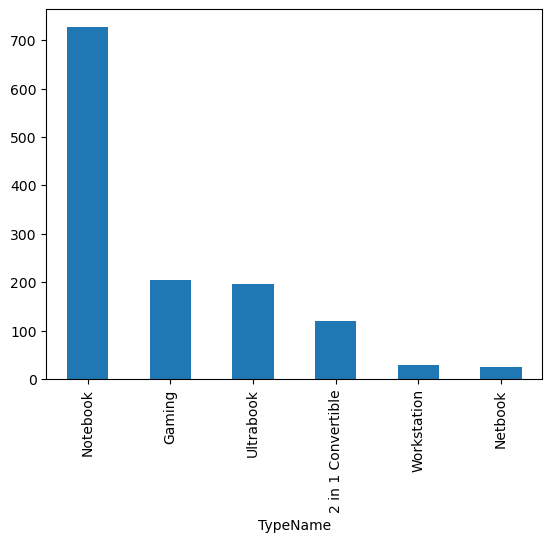

In [132]:
df['TypeName'].value_counts().plot(kind = 'bar')

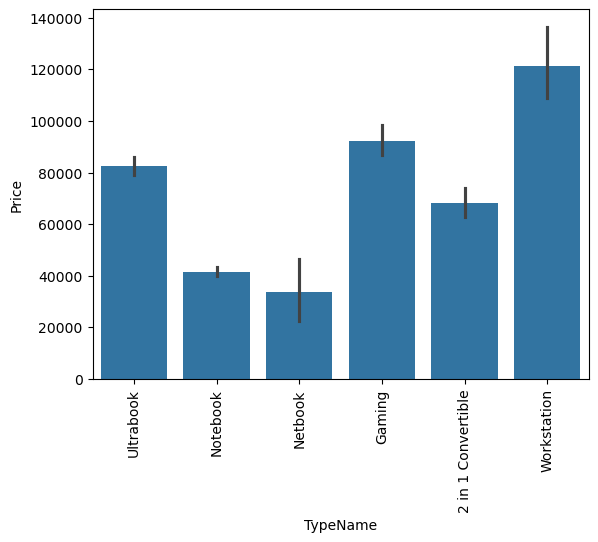

In [133]:
sns.barplot( x = df['TypeName'], y = df['Price'])
plt.xticks(rotation = 'vertical')
plt.show()

<Axes: xlabel='Touchscreen', ylabel='Price'>

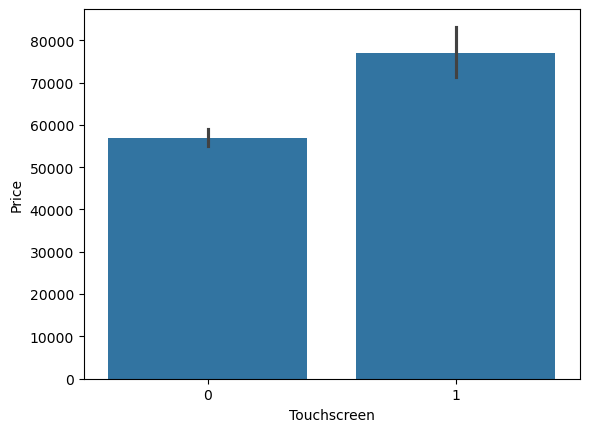

In [134]:
sns.barplot(x=df['Touchscreen'],y=df['Price'])

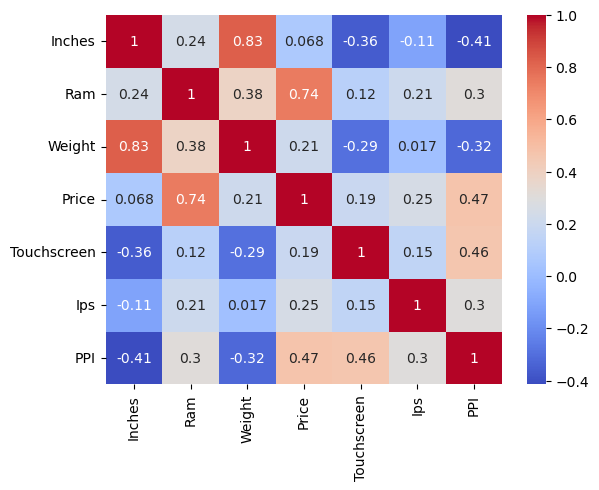

In [136]:
numeric_df = df.select_dtypes(include=['number'])
sns.heatmap(numeric_df.corr(), annot=True, cmap="coolwarm")
plt.show()

<Axes: xlabel='Price', ylabel='Density'>

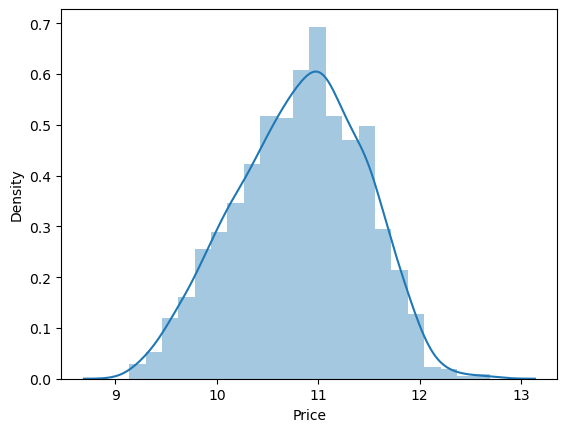

In [138]:
sns.distplot(np.log(df['Price']))

In [140]:
df.sample(3)

,Company,TypeName,Inches,Ram,Memory,Weight,Price,Touchscreen,Ips,PPI,Cpu brand,HDD,SSD,Gpu Brand,OS
86,HP,Ultrabook,15.6,8,256 SSD,1.83,37242.72,0,1,141.211998,Intel Core i7,,256 SSD,Nvidia,Windows
322,Asus,Notebook,14.0,8,256 SSD,2.00,58288.32,0,0,157.350512,Intel Core i7,,256 SSD,Intel,Windows
1301,HP,Notebook,15.6,6,1000 HDD,2.19,40705.92,0,0,100.454670,Intel Core i7,1000 HDD,,AMD,Windows


In [129]:
df.drop(columns = ['Memory'],inplace = True)

In [131]:
df['HDD'] = df['HDD'].astype(str).str.replace('HDD', '').str.strip()
df['HDD'] = pd.to_numeric(df['HDD'], errors='coerce').fillna(0).astype(int)

In [133]:
df['SSD'] = df['SSD'].astype(str).str.replace('SSD', '').str.strip()
df['SSD'] = pd.to_numeric(df['SSD'], errors='coerce').fillna(0).astype(int)

## Modeling

In [136]:
X = df.drop(columns=['Price'])
y = np.log(df['Price'])

In [138]:
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import r2_score, mean_absolute_error, accuracy_score
from sklearn.model_selection import train_test_split

In [140]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2, random_state = 2)

In [142]:
X_train

,Company,TypeName,Inches,Ram,Weight,Touchscreen,Ips,PPI,Cpu brand,HDD,SSD,Gpu Brand,OS
91,Acer,Notebook,15.6,8,2.20,0,0,141.211998,Intel Core i7,1000,0,Nvidia,Windows
940,HP,Gaming,17.3,8,2.75,0,1,127.335675,Intel Core i5,1000,128,Nvidia,Windows
1026,HP,Notebook,14.0,4,2.31,0,0,111.935204,Intel Core i5,500,0,Intel,Windows
1257,Dell,Notebook,15.6,4,2.29,0,0,100.454670,Intel Core i3,500,0,Intel,Windows
487,Dell,Notebook,15.6,16,2.06,0,0,141.211998,Intel Core i7,0,512,Nvidia,Windows
...,...,...,...,...,...,...,...,...,...,...,...,...,...
466,Acer,Notebook,15.6,4,2.20,0,0,100.454670,Intel Core i3,500,0,Nvidia,Windows
299,Asus,Ultrabook,15.6,16,1.63,0,0,141.211998,Intel Core i7,0,512,Nvidia,Windows
493,Acer,Notebook,15.6,8,2.20,0,0,100.454670,AMD Processor,1000,0,AMD,Windows
527,Lenovo,Notebook,15.6,8,2.20,0,0,100.454670,Intel Core i3,2000,0,Nvidia,others/No OS/Linux


## Linear Regression

In [145]:
from sklearn.linear_model import LinearRegression

In [147]:
step1 = ColumnTransformer(
    transformers = [
        (
            'col_trf', 
            OneHotEncoder(sparse_output = False, drop = 'first'), 
            [0,1,8,11,12]
        )
    ], remainder = 'passthrough'
)

In [149]:
step2 = LinearRegression()

In [151]:
pipe1 = Pipeline([
    ('step1', step1),
    ('step2', step2)
])

In [153]:
pipe1.fit(X_train, y_train)

,steps,"[('step1', ...), ('step2', ...)]"
,transform_input,None
,memory,None
,verbose,False
,transformers,"[('col_trf', ...)]"
,remainder,'passthrough'
,sparse_threshold,0.3
,n_jobs,None
,transformer_weights,None
,verbose,False
,verbose_feature_names_out,True


In [155]:
y_pred = pipe1.predict(X_test)

In [157]:
print('R2 score',r2_score(y_test,y_pred)*100)
print('MAE',mean_absolute_error(y_test,y_pred)*100)

R2 score 82.60311053450644
MAE 20.062007776010585


#### Ridge, Lasso, and Elastic Net are methods to avoid overfitting in regression. Ridge is used when all features matter, as it keeps them but makes their effects smaller. Lasso is used when only some features are important, since it can remove the unimportant ones by setting their coefficients to zero. Elastic Net is a mix of both, useful when you have many features that may also be correlated.

## Ridge Regression

In [161]:
from sklearn.linear_model import Ridge

step1 = ColumnTransformer(
    transformers = [
        (
            'col_trf', 
            OneHotEncoder(sparse_output = False, drop = 'first'), 
            [0,1,8,11,12]
        )
    ], remainder = 'passthrough'
)

step2 = Ridge(alpha = 5)

pipe2 = Pipeline([
    ('step1', step1),
    ('step2', step2)
])

In [163]:
pipe2.fit(X_train, y_train)

,steps,"[('step1', ...), ('step2', ...)]"
,transform_input,None
,memory,None
,verbose,False
,transformers,"[('col_trf', ...)]"
,remainder,'passthrough'
,sparse_threshold,0.3
,n_jobs,None
,transformer_weights,None
,verbose,False
,verbose_feature_names_out,True


In [165]:
y_pred = pipe2.predict(X_test)

In [167]:
print('R2 score',r2_score(y_test,y_pred)*100)
print('MAE',mean_absolute_error(y_test,y_pred)*100)

R2 score 83.00861219029183
MAE 19.787267024436595


## Lasso Regression

In [170]:
from sklearn.linear_model import Lasso

step1 = ColumnTransformer(
    transformers = [
        (
            'col_trf', 
            OneHotEncoder(sparse_output = False, drop = 'first'), 
            [0,1,8,11,12]
        )
    ], remainder = 'passthrough'
)

step2 = Lasso(alpha = 0.001)

pipe12 = Pipeline([
    ('step1', step1),
    ('step2', step2)
])
pipe12.fit(X_train,y_train)

y_pred = pipe12.predict(X_test)

print('R2 score',r2_score(y_test,y_pred)*100)
print('MAE',mean_absolute_error(y_test,y_pred)*100)

R2 score 82.93901212332827
MAE 19.86400113482518


## ElasticNet Regression

In [173]:
from sklearn.linear_model import ElasticNet

step1 = ColumnTransformer(
    transformers = [
        (
            'col_trf', 
            OneHotEncoder(sparse_output = False, drop = 'first'), 
            [0,1,8,11,12]
        )
    ], remainder = 'passthrough'
)

step2 = ElasticNet(alpha = 0.001, l1_ratio = 0.5)

pipe3 = Pipeline([
    ('step1', step1),
    ('step2', step2)
])

pipe3.fit(X_train,y_train)

y_pred = pipe3.predict(X_test)

print('R2 score',r2_score(y_test,y_pred)*100)
print('MAE',mean_absolute_error(y_test,y_pred)*100)

R2 score 83.04114569913304
MAE 19.813973741454852


## KNN

In [176]:
from sklearn.neighbors import KNeighborsRegressor

step1 = ColumnTransformer(
    transformers = [
        (
            'col_trf', 
            OneHotEncoder(sparse_output = False, drop = 'first'), 
            [0,1,8,11,12]
        )
    ], remainder = 'passthrough'
)

step2 = KNeighborsRegressor( n_neighbors= 3)

pipe4 = Pipeline([
    ('step1', step1),
    ('step2', step2)
])

pipe4.fit(X_train,y_train)

y_pred = pipe4.predict(X_test)

print('R2 score',r2_score(y_test,y_pred)*100)
print('MAE',mean_absolute_error(y_test,y_pred)*100)

R2 score 81.31005701645037
MAE 19.466842735312813


## Decision Tree Regressor
#### A Decision Tree Regressor is a machine learning model that predicts a number by splitting data into smaller groups using simple yes/no questions, and at the end, it gives the average value of the group where the data falls.

In [178]:
from sklearn.tree import DecisionTreeRegressor

In [179]:
step1 = ColumnTransformer(
    transformers = [
        (
            'col_trf', 
            OneHotEncoder(sparse_output = False, drop = 'first'), 
            [0,1,8,11,12]
        )
    ], remainder = 'passthrough'
)

step2 = DecisionTreeRegressor( max_depth = 11)

pipe5 = Pipeline([
    ('step1', step1),
    ('step2', step2)
])

pipe5.fit(X_train,y_train)

y_pred = pipe5.predict(X_test)

print('R2 score',r2_score(y_test,y_pred)*100)
print('MAE',mean_absolute_error(y_test,y_pred)*100)

R2 score 82.41269503696115
MAE 17.873829503624343


## Support Vector Regressor
#### 👉 SVR is a machine learning model that tries to fit the data within a margin (tube) around the predicted line, instead of predicting exactly every point.

In [181]:
from sklearn.svm import SVR

# Kernel: Defines how data is transformed; common ones are Linear (simple) and RBF (captures non-linear patterns).
# C: Controls error tolerance; small C = simple model, large C = more accuracy but risk of overfitting.
# Epsilon (ε): Sets a margin where small errors are ignored; small ε = sensitive fit, large ε = ignores minor noise.

In [182]:
step1 = ColumnTransformer(
    transformers = [
        (
            'col_trf', 
            OneHotEncoder(sparse_output = False, drop = 'first'), 
            [0,1,8,11,12]
        )
    ], remainder = 'passthrough'
)

step2 = SVR(kernel= 'rbf', C = 10000, epsilon=0.1 )

pipe6 = Pipeline([
    ('step1', step1),
    ('step2', step2)
])

pipe6.fit(X_train,y_train)

y_pred = pipe6.predict(X_test)

print('R2 score',r2_score(y_test,y_pred)*100)
print('MAE',mean_absolute_error(y_test,y_pred)*100)

R2 score 84.83856234380673
MAE 18.55137854185647


## RandomForest regressor
#### Random Forest Regressor = many decision trees working together to give more stable and accurate predictions.

In [189]:
from sklearn.ensemble import RandomForestRegressor

In [191]:
step1 = ColumnTransformer(
    transformers = [
        (
            'col_trf', 
            OneHotEncoder(sparse_output = False, drop = 'first'), 
            [0,1,8,11,12]
        )
    ], remainder = 'passthrough'
)

step2 = RandomForestRegressor(
    n_estimators = 200,
    random_state = 5,
    max_samples = 0.5,
    max_features = 0.7,
    max_depth = 15
)

pipe7 = Pipeline([
    ('step1', step1),
    ('step2', step2)
])

pipe7.fit(X_train,y_train)

y_pred = pipe7.predict(X_test)

print('R2 score',r2_score(y_test,y_pred)*100)
print('MAE',mean_absolute_error(y_test,y_pred)*100)

R2 score 88.74350937940847
MAE 15.316780361566318


## Gradient Boosting
#### GBR = many small trees working in sequence, each correcting the mistakes of the last, to make strong predictions.

In [194]:
from sklearn.ensemble import GradientBoostingRegressor

In [196]:
step1 = ColumnTransformer(
    transformers = [
        (
            'col_trf', 
            OneHotEncoder(sparse_output = False, drop = 'first'), 
            [0,1,8,11,12]
        )
    ], remainder = 'passthrough'
)

step2 = GradientBoostingRegressor(n_estimators = 500)

pipe8 = Pipeline([
    ('step1', step1),
    ('step2', step2)
])

pipe8.fit(X_train,y_train)

y_pred = pipe8.predict(X_test)

print('R2 score',r2_score(y_test,y_pred)*100)
print('MAE',mean_absolute_error(y_test,y_pred)*100)

R2 score 88.7920859411066
MAE 15.325847287412786


## XGBoost
#### The XGBRegressor (Extreme Gradient Boosting Regressor) is an advanced version of Gradient Boosting. It is faster, more efficient, and gives better accuracy because it uses clever tricks like regularization, parallel processing, and handling missing values automatically.

In [198]:
from xgboost import XGBRegressor

In [201]:
step1 = ColumnTransformer(
    transformers = [
        (
            'col_trf', 
            OneHotEncoder(sparse_output = False, drop = 'first'), 
            [0,1,8,11,12]
        )
    ], remainder = 'passthrough'
)

step2 = XGBRegressor(n_estimators = 50, max_depth = 5, learning_rate= 0.3)

pipe9 = Pipeline([
    ('step1', step1),
    ('step2', step2)
])

pipe9.fit(X_train,y_train)

y_pred = pipe9.predict(X_test)

print('R2 score',r2_score(y_test,y_pred)*100)
print('MAE',mean_absolute_error(y_test,y_pred)*100)

R2 score 89.37398441172456
MAE 15.017010154133404


## Voting Regressor
#### A Voting Regressor is an ensemble model that combines predictions from multiple different regressors and then takes the average of their outputs to make the final prediction.

In [204]:
from sklearn.ensemble import VotingRegressor

In [206]:
step1 = ColumnTransformer(
    transformers = [
        (
            'col_trf', 
            OneHotEncoder(sparse_output = False, drop = 'first'), 
            [0,1,8,11,12]
        )
    ], remainder = 'passthrough'
)


rf = RandomForestRegressor(n_estimators=200,random_state=5,max_samples=0.5,max_features=0.7,max_depth=15)
gb = GradientBoostingRegressor(n_estimators=300, max_features= 0.5)
xgb = XGBRegressor(n_estimators=50,learning_rate=0.3,max_depth=10)

step2 = VotingRegressor([('rf', rf), ('gb', gb), ('xgb',xgb)],weights=[1,1,1])

pipe10 = Pipeline([
    ('step1',step1),
    ('step2',step2)
])

pipe10.fit(X_train,y_train)

y_pred = pipe10.predict(X_test)

print('R2 score',r2_score(y_test,y_pred)*100)
print('MAE',mean_absolute_error(y_test,y_pred)*100)

R2 score 89.57429336419295
MAE 14.656213456323478


## Stacking Regressor
#### A Stacking Regressor is an ensemble method where you combine predictions of multiple models (called base learners) and feed them into a final model (called the meta-learner) that learns how to best combine them.

In [216]:
from sklearn.ensemble import StackingRegressor

In [218]:
step1 = ColumnTransformer(
    transformers = [
        (
            'col_trf', 
            OneHotEncoder(sparse_output = False, drop = 'first'), 
            [0,1,8,11,12]
        )
    ], remainder = 'passthrough'
)

estimators = [
    ('rf', RandomForestRegressor(n_estimators=300,random_state=5,max_samples=0.5,max_features=0.7,max_depth=15)),
    ('gb', GradientBoostingRegressor(n_estimators=500,max_features=0.5)),
    ('xgb', XGBRegressor(n_estimators=50,learning_rate=0.3,max_depth=10))
]

step2 = StackingRegressor(estimators=estimators, final_estimator = Ridge( alpha = 100 ))
# alpha = 100 means strong regularization → gives more stable and balanced weights to each base model.

pipe11 = Pipeline([
    ('step1',step1),
    ('step2',step2)
])

pipe11.fit(X_train,y_train)

y_pred = pipe11.predict(X_test)

print('R2 score',r2_score(y_test,y_pred)*100)
print('MAE',mean_absolute_error(y_test,y_pred)*100)

R2 score 88.70963244890463
MAE 15.189439027863969


# MODELS COMPARISON

Linear Regression → R2: 82.60, MAE: 20.06
Ridge → R2: 83.01, MAE: 19.79
Lasso → R2: 82.94, MAE: 19.86
ElasticNet → R2: 83.04, MAE: 19.81
KNN → R2: 81.31, MAE: 19.47
Decision Tree → R2: 82.73, MAE: 17.75
SVR → R2: 84.84, MAE: 18.55
Random Forest → R2: 88.74, MAE: 15.32
Gradient Boosting → R2: 88.76, MAE: 15.32
XGBoost → R2: 89.37, MAE: 15.02
Voting Regressor → R2: 89.57, MAE: 14.65
Stacking Regressor → R2: 88.74, MAE: 15.09


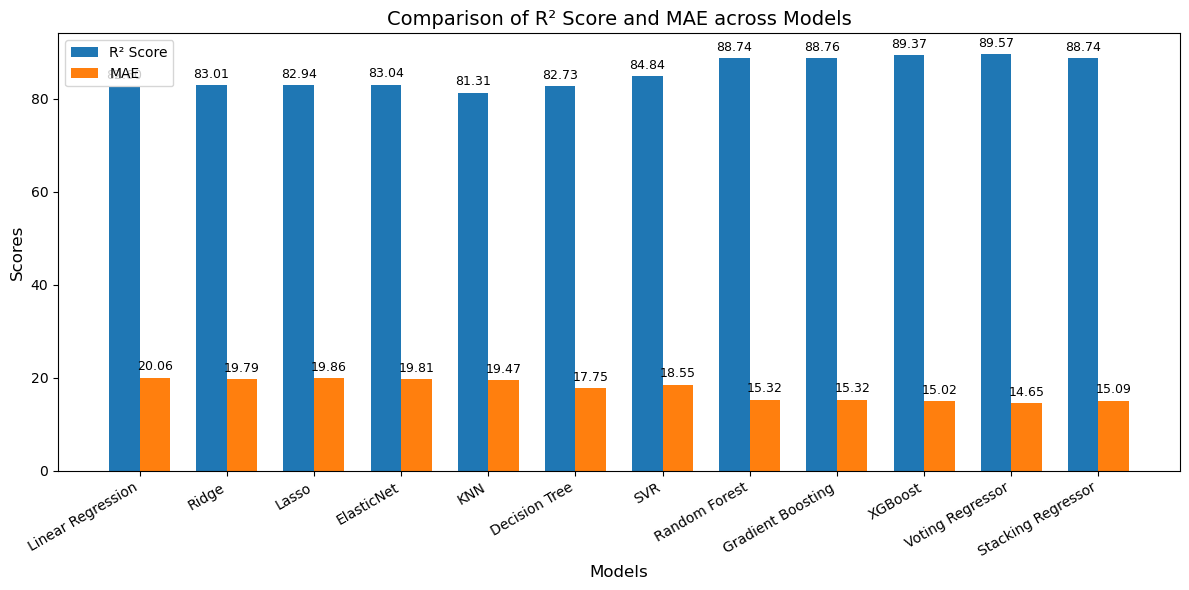

In [221]:
step1 = ColumnTransformer(
    transformers=[
        ('col_trf',
         OneHotEncoder(sparse_output=False, drop='first'),
         [0, 1, 8, 11, 12])
    ],
    remainder='passthrough'
)

pipelines = {
    "Linear Regression": pipe1,
    "Ridge": pipe2,
    "Lasso": pipe12,
    "ElasticNet": pipe3,
    "KNN": pipe4,
    "Decision Tree": pipe5,
    "SVR": pipe6,
    "Random Forest": pipe7,
    "Gradient Boosting": pipe8,
    "XGBoost": pipe9,
    "Voting Regressor": pipe10,
    "Stacking Regressor": pipe11
}

results = {}
for name, pipe in pipelines.items():
    pipe.fit(X_train, y_train)
    y_pred = pipe.predict(X_test)
    r2 = r2_score(y_test, y_pred) * 100
    mae = mean_absolute_error(y_test, y_pred) * 100
    results[name] = {"r2": r2, "mae": mae}
    print(f"{name} → R2: {r2:.2f}, MAE: {mae:.2f}")

model_names = list(results.keys())
r2_scores = [results[m]["r2"] for m in model_names]
mae_scores = [results[m]["mae"] for m in model_names]

x = np.arange(len(model_names))
width = 0.35

fig, ax = plt.subplots(figsize=(12,6))

bar1 = ax.bar(x - width/2, r2_scores, width, label="R² Score")
bar2 = ax.bar(x + width/2, mae_scores, width, label="MAE")

ax.set_xlabel("Models", fontsize=12)
ax.set_ylabel("Scores", fontsize=12)
ax.set_title("Comparison of R² Score and MAE across Models", fontsize=14)
ax.set_xticks(x)
ax.set_xticklabels(model_names, rotation=30, ha="right")
ax.legend()

for bars in [bar1, bar2]:
    for bar in bars:
        height = bar.get_height()
        ax.annotate(f'{height:.2f}',
                    xy=(bar.get_x() + bar.get_width()/2, height),
                    xytext=(0,3),
                    textcoords="offset points",
                    ha="center", va="bottom", fontsize=9)

plt.tight_layout()
plt.show()

# Testing

In [228]:
import numpy as np
import pandas as pd

model = joblib.load("laptop_price_model.pkl")

sample = pd.DataFrame({
    'Company': ['Apple'],
    'TypeName': ['Ultrabook'],
    'Inches': [13.3],
    'Ram': [8],
    'Weight': [1.37],
    'Touchscreen': [0],
    'Ips': [1],
    'PPI': [226.983005],
    'Cpu brand': ['Intel Core i5'],
    'HDD': [0],
    'SSD': [128],
    'Gpu Brand': ['Intel'],
    'OS': ['mac']
})

log_price = model.predict(sample)[0]

actual_price = np.exp(log_price)

print(f"💻 Predicted Laptop Price: {actual_price:.0f}")

💻 Predicted Laptop Price: 73873
